In [48]:
!pip install pandas openpyxl

In [49]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("HousePricePrediction.xlsx")


In [50]:
df.shape

(2919, 13)

In [51]:
print(df.dtypes)

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [53]:
df.drop(['Id'],
             axis=1,
             inplace=True)


In [54]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [55]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean()) 

In [56]:
new_dataset = df.dropna()

new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

<Axes: >

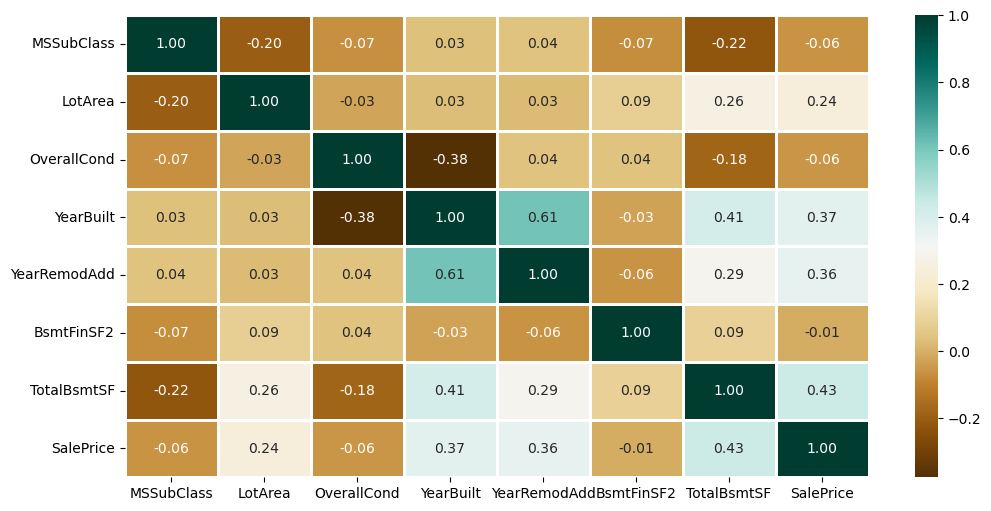

In [57]:
# Select only numerical features for correlation analysis
numerical_dataset = new_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# This code is modified by Susobhan Akhuli


In [58]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [59]:
new_dataset["SalePrice"].describe()

count      2913.000000
mean     180921.195890
std       56232.174632
min       34900.000000
25%      163000.000000
50%      180921.195890
75%      180921.195890
max      755000.000000
Name: SalePrice, dtype: float64

In [60]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [61]:
unique_values = new_dataset["MSZoning"].unique()
print(f"Unique values in '{"MSZoning"}': {unique_values}")

unique_values = new_dataset["LotConfig"].unique()
print(f"Unique values in '{"LotConfig"}': {unique_values}")

unique_values = new_dataset["BldgType"].unique()
print(f"Unique values in '{"BldgType"}': {unique_values}")

unique_values = new_dataset["Exterior1st"].unique()
print(f"Unique values in '{"Exterior1st"}': {unique_values}")

Unique values in 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in 'Exterior1st': ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

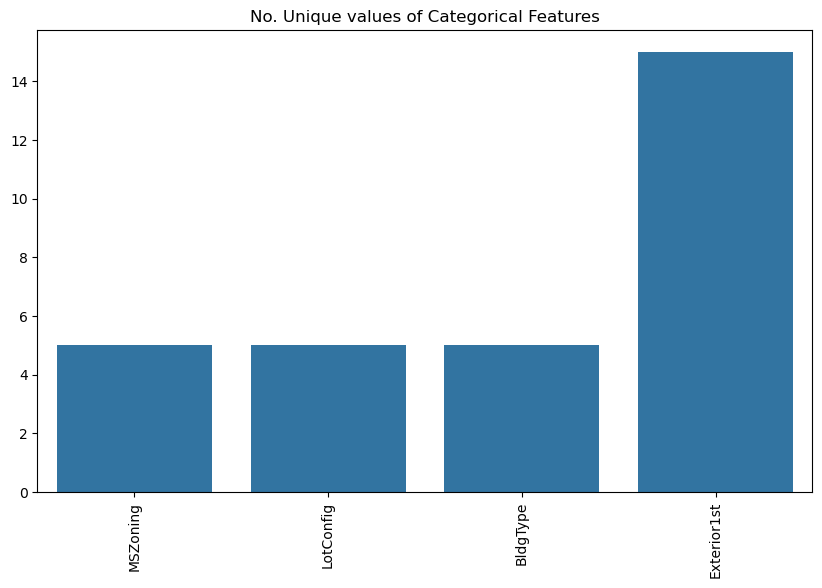

In [62]:
unique_values = []
for col in object_cols:
  unique_values.append(new_dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


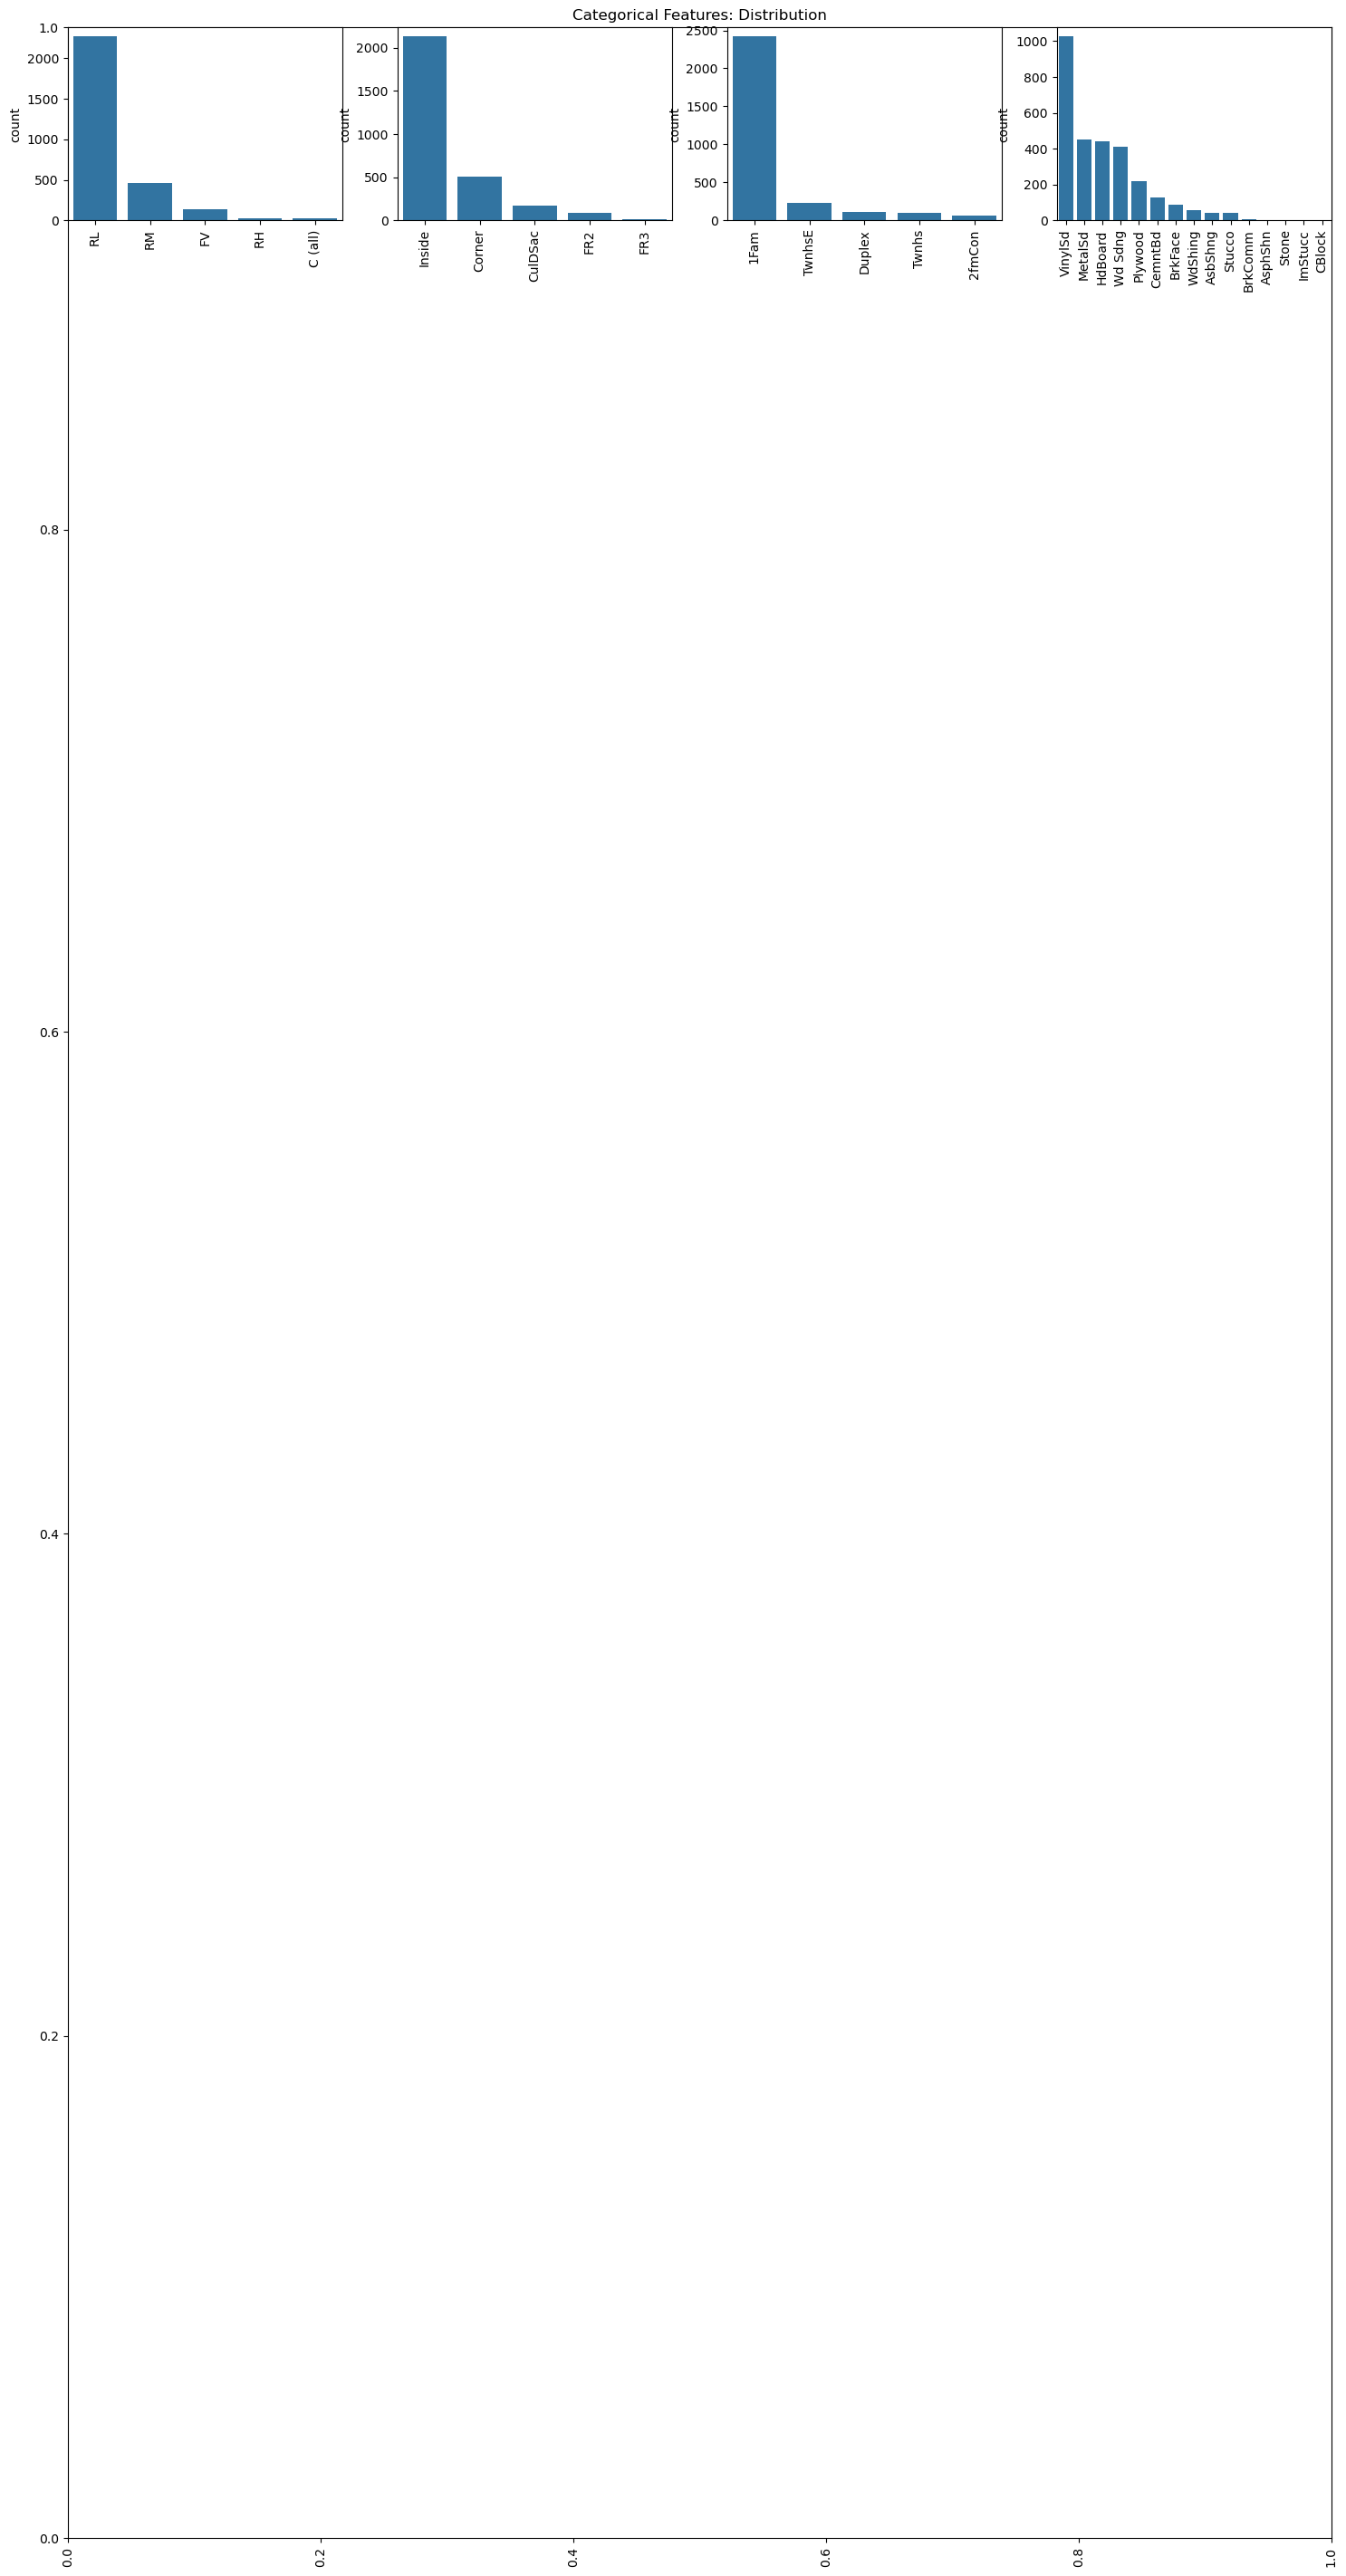

In [63]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = new_dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [64]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)



In [65]:
print(df_final.columns)

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')


In [66]:
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_final.drop("SalePrice", axis=1)
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)  

In [68]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mape = mean_absolute_percentage_error(y_test, predictions) * 100
print(f'MAPE: {mape:.2f}%')

# Calculate Absolute Percentage Errors
ape = np.abs((y_test - predictions) / y_test) * 100

# Calculate Median Absolute Percentage Error
medape = np.median(ape)
print(f'MedAPE: {medape:.2f}%')

MAPE: 18.21%
MedAPE: 14.47%


In [70]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error:", mape)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Absolute Error: 32972.56260595412
Mean Absolute Percentage Error: 0.1820536324821776
Mean Squared Error: 2523607916.6230903


In [71]:
import joblib

joblib.dump(model, 'my_model.pkl')


['my_model.pkl']

In [72]:
first_row = X_test.head(1)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

print(first_row)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  TotalBsmtSF  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing
1952          20    13068            5       1976          1976        48.0       1211.0               0.0          0.0          0.0          1.0          0.0               1.0                0.0            0.0            0.0               0.0            1.0              0.0              0.0             0.0              0.0                  0.0                 

In [79]:

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
new_df = X_train.iloc[[2]].reset_index(drop=True)
y_pred = model.predict(new_df)
print(y_pred)
# print(X_test.head(3))
print(y_test.head(3))
# print(y_train.head(3))

[172746.0771239]
1952    180921.19589
2128    180921.19589
1393    163000.00000
Name: SalePrice, dtype: float64
